In [827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Part A: Data Preprocessing Tasks

In [828]:
df=pd.read_csv('Retail_Transactions_2000.csv')

In [829]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [830]:
df.size

22000

In [831]:
df.shape

(2000, 11)

In [832]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [833]:
df.duplicated().sum()

np.int64(0)

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [835]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [836]:
print(df['Gender'].unique())

['Female' 'Other' 'Male']


In [837]:
print(df[(df['Age'] < 0) | (df['Age'] > 120)])

Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount]
Index: []


In [838]:
print(df['City'].unique())

['Bengaluru' 'Pune' 'Hyderabad' 'Chennai' 'Delhi' 'Jaipur' 'Lucknow'
 'Ahmedabad' 'Kolkata' 'Mumbai']


In [839]:
print(df['PaymentMode'].unique())

['Cash' 'Card' 'Wallet' 'UPI']


In [840]:
df['CheckAmount']=df['Quantity']*df['Price']
print(df[['TotalAmount', 'CheckAmount']])

      TotalAmount  CheckAmount
0           13437        13437
1            5255         5255
2             111          111
3           14730        14730
4            3123         3123
...           ...          ...
1995         4872         4872
1996         8232         8232
1997         3246         3246
1998         5418         5418
1999         3122         3122

[2000 rows x 2 columns]


In [841]:
df=df.drop_duplicates(subset=['TransactionID'])

In [842]:
df.shape

(2000, 12)

In [843]:
df['Gender']=df['Gender'].str.strip().str.capitalize()
df['Gender']=df['Gender'].replace({'M':'Male', 'F':'Female','MALE':'Male', 'FEMALE':'Female'})

In [844]:
df['PaymentMode']=df['PaymentMode'].str.strip().str.capitalize()

In [845]:
df['City']=df['City'].str.strip().str.title()

In [846]:
print(df[(df['Quantity']<=0) | (df['Price']<=0)])

Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount, CheckAmount]
Index: []


In [847]:
df['TotalAmount']=df['TotalAmount'].fillna(df['Quantity']*df['Price'])

In [848]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,CheckAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,3123


In [849]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

In [850]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,CheckAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,3123


In [851]:
df['PurchaseMonth']=df['PurchaseDate'].dt.month

In [852]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,CheckAmount,PurchaseMonth
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,13437,3
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,5255,1
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,111,4
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,14730,8
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,3123,9


In [853]:
df['PurchaseDayOfWeek']=df['PurchaseDate'].dt.dayofweek

In [854]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,CheckAmount,PurchaseMonth,PurchaseDayOfWeek
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,13437,3,2
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,5255,1,6
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,111,4,1
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,14730,8,2
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,3123,9,5


In [855]:
bins=[0,25,40,60,120]
labels=['18-25', '26-40', '41-60', '60+']
df['AgeGroup']=pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [856]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,CheckAmount,PurchaseMonth,PurchaseDayOfWeek,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,13437,3,2,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,5255,1,6,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,111,4,1,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,14730,8,2,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,3123,9,5,41-60


In [857]:
df.drop('TransactionID', axis=1, inplace=True)

In [858]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [859]:
df=pd.get_dummies(df, columns=['City', 'ProductCategory', 'PaymentMode', 'AgeGroup'], drop_first=False)

In [860]:
df.head()

,CustomerID,Gender,Age,Quantity,Price,PurchaseDate,TotalAmount,CheckAmount,PurchaseMonth,PurchaseDayOfWeek,...,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Card,PaymentMode_Cash,PaymentMode_Upi,PaymentMode_Wallet,AgeGroup_18-25,AgeGroup_26-40,AgeGroup_41-60,AgeGroup_60+
0,C2824,0,33,3,4479,2023-03-15,13437,13437,3,2,...,False,False,False,True,False,False,False,True,False,False
1,C1409,2,20,5,1051,2023-01-22,5255,5255,1,6,...,False,False,True,False,False,False,True,False,False,False
2,C5506,2,47,1,111,2023-04-18,111,111,4,1,...,False,False,False,False,False,True,False,False,True,False
3,C5012,2,21,5,2946,2023-08-09,14730,14730,8,2,...,True,False,False,True,False,False,True,False,False,False
4,C4657,0,41,1,3123,2023-09-23,3123,3123,9,5,...,False,True,False,False,False,True,False,False,True,False


In [861]:
df.shape

(2000, 35)

In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CustomerID                   2000 non-null   object        
 1   Gender                       2000 non-null   int64         
 2   Age                          2000 non-null   int64         
 3   Quantity                     2000 non-null   int64         
 4   Price                        2000 non-null   int64         
 5   PurchaseDate                 2000 non-null   datetime64[ns]
 6   TotalAmount                  2000 non-null   int64         
 7   CheckAmount                  2000 non-null   int64         
 8   PurchaseMonth                2000 non-null   int32         
 9   PurchaseDayOfWeek            2000 non-null   int32         
 10  City_Ahmedabad               2000 non-null   bool          
 11  City_Bengaluru               2000 non-null 

In [863]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns to encode:", cat_cols)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Categorical columns to encode: Index(['CustomerID', 'City_Ahmedabad', 'City_Bengaluru', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Jaipur', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Pune', 'ProductCategory_Beauty',
       'ProductCategory_Books', 'ProductCategory_Electronics',
       'ProductCategory_Fashion', 'ProductCategory_Furniture',
       'ProductCategory_Groceries', 'ProductCategory_Sports',
       'PaymentMode_Card', 'PaymentMode_Cash', 'PaymentMode_Upi',
       'PaymentMode_Wallet', 'AgeGroup_18-25', 'AgeGroup_26-40',
       'AgeGroup_41-60', 'AgeGroup_60+'],
      dtype='object')


In [864]:
from sklearn.preprocessing import MinMaxScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns to scale:", list(num_cols))
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Numeric columns to scale: ['CustomerID', 'Gender', 'Age', 'Quantity', 'Price', 'TotalAmount', 'CheckAmount', 'City_Ahmedabad', 'City_Bengaluru', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Jaipur', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_Pune', 'ProductCategory_Beauty', 'ProductCategory_Books', 'ProductCategory_Electronics', 'ProductCategory_Fashion', 'ProductCategory_Furniture', 'ProductCategory_Groceries', 'ProductCategory_Sports', 'PaymentMode_Card', 'PaymentMode_Cash', 'PaymentMode_Upi', 'PaymentMode_Wallet', 'AgeGroup_18-25', 'AgeGroup_26-40', 'AgeGroup_41-60', 'AgeGroup_60+']


In [865]:
df.head()

,CustomerID,Gender,Age,Quantity,Price,PurchaseDate,TotalAmount,CheckAmount,PurchaseMonth,PurchaseDayOfWeek,...,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Card,PaymentMode_Cash,PaymentMode_Upi,PaymentMode_Wallet,AgeGroup_18-25,AgeGroup_26-40,AgeGroup_41-60,AgeGroup_60+
0,0.197003,0.0,0.288462,0.5,0.893673,2023-03-15,0.536495,0.536495,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.032741,1.0,0.038462,1.0,0.194082,2023-01-22,0.207094,0.207094,1,6,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.487791,1.0,0.557692,0.0,0.002245,2023-04-18,0.000000,0.000000,4,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.432297,1.0,0.057692,1.0,0.580816,2023-08-09,0.588550,0.588550,8,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.389567,0.0,0.442308,0.0,0.616939,2023-09-23,0.121261,0.121261,9,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [866]:
df.isnull().sum()

CustomerID                     0
Gender                         0
Age                            0
Quantity                       0
Price                          0
PurchaseDate                   0
TotalAmount                    0
CheckAmount                    0
PurchaseMonth                  0
PurchaseDayOfWeek              0
City_Ahmedabad                 0
City_Bengaluru                 0
City_Chennai                   0
City_Delhi                     0
City_Hyderabad                 0
City_Jaipur                    0
City_Kolkata                   0
City_Lucknow                   0
City_Mumbai                    0
City_Pune                      0
ProductCategory_Beauty         0
ProductCategory_Books          0
ProductCategory_Electronics    0
ProductCategory_Fashion        0
ProductCategory_Furniture      0
ProductCategory_Groceries      0
ProductCategory_Sports         0
PaymentMode_Card               0
PaymentMode_Cash               0
PaymentMode_Upi                0
PaymentMod

In [867]:
invalid_rows=df[(df['Quantity']<0) |
                (df['Price']<0) |
                (df['TotalAmount']<0)]
print(invalid_rows)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Quantity, Price, PurchaseDate, TotalAmount, CheckAmount, PurchaseMonth, PurchaseDayOfWeek, City_Ahmedabad, City_Bengaluru, City_Chennai, City_Delhi, City_Hyderabad, City_Jaipur, City_Kolkata, City_Lucknow, City_Mumbai, City_Pune, ProductCategory_Beauty, ProductCategory_Books, ProductCategory_Electronics, ProductCategory_Fashion, ProductCategory_Furniture, ProductCategory_Groceries, ProductCategory_Sports, PaymentMode_Card, PaymentMode_Cash, PaymentMode_Upi, PaymentMode_Wallet, AgeGroup_18-25, AgeGroup_26-40, AgeGroup_41-60, AgeGroup_60+]
Index: []

[0 rows x 35 columns]


In [868]:
df.drop('CustomerID', axis=1, inplace=True)

In [869]:
df.drop('PurchaseDate', axis=1, inplace=True)

In [870]:
df.to_csv('Retail_Cleaned.csv', index=False)

Part B: Data Visualization Tasks


In [871]:
df=pd.read_csv("Retail_Cleaned.csv")

In [872]:
df.head()

,Gender,Age,Quantity,Price,TotalAmount,CheckAmount,PurchaseMonth,PurchaseDayOfWeek,City_Ahmedabad,City_Bengaluru,...,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Card,PaymentMode_Cash,PaymentMode_Upi,PaymentMode_Wallet,AgeGroup_18-25,AgeGroup_26-40,AgeGroup_41-60,AgeGroup_60+
0,0.0,0.288462,0.5,0.893673,0.536495,0.536495,3,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.038462,1.0,0.194082,0.207094,0.207094,1,6,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.557692,0.0,0.002245,0.000000,0.000000,4,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.057692,1.0,0.580816,0.588550,0.588550,8,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.442308,0.0,0.616939,0.121261,0.121261,9,5,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


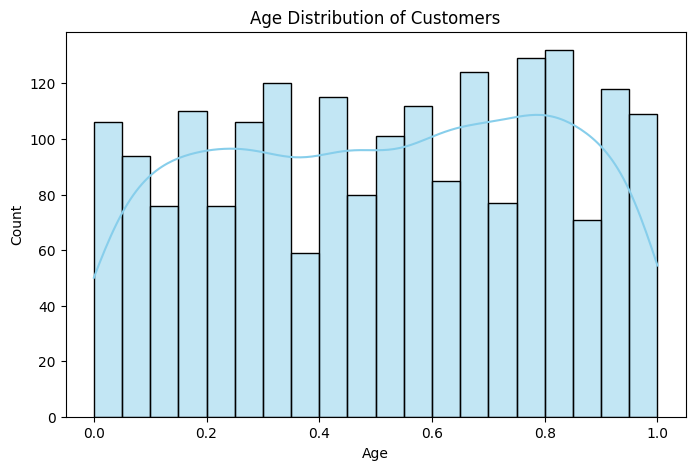

In [873]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\Dharshini\AppData\Local\Temp\ipykernel_23324\2253369066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


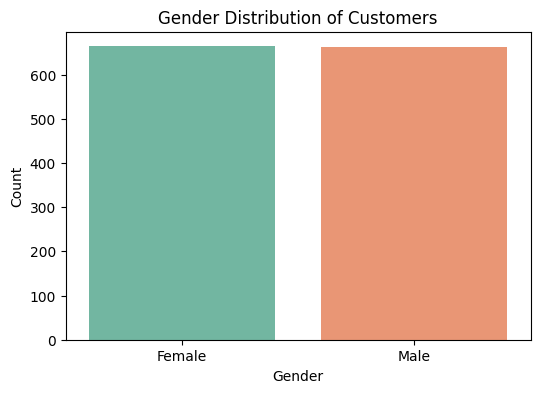

In [874]:
gender_map = {0: 'Female', 1: 'Male', 2: 'Other'}
df['Gender'] = df['Gender'].map(gender_map)
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


C:\Users\Dharshini\AppData\Local\Temp\ipykernel_23324\837233830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')


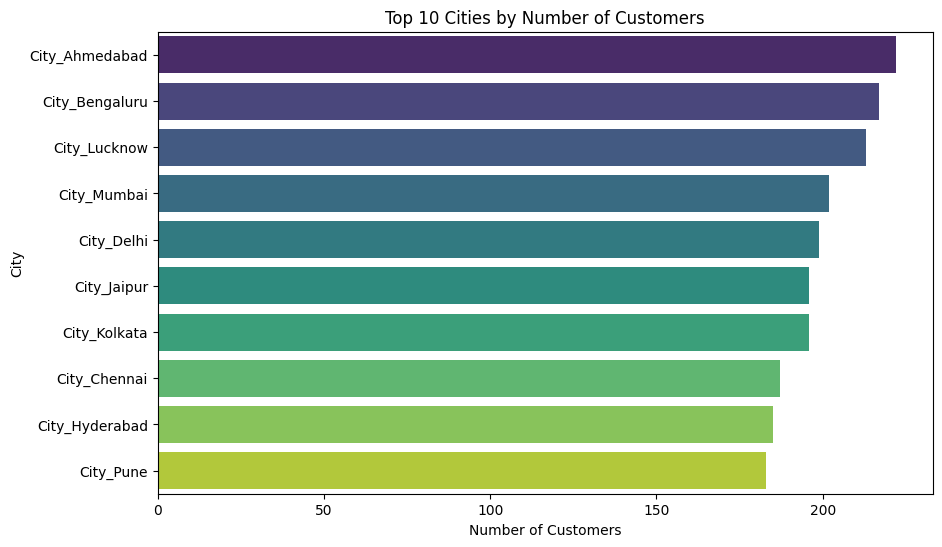

In [875]:
city_cols = [col for col in df.columns if col.startswith('City_')]

city_counts = df[city_cols].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


C:\Users\Dharshini\AppData\Local\Temp\ipykernel_23324\1862739082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


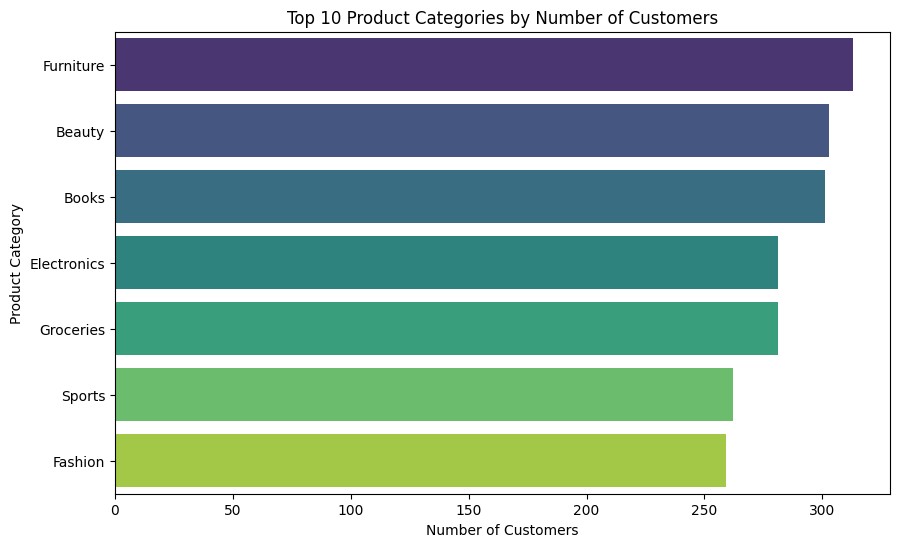

In [876]:
product_cols = [col for col in df.columns if col.startswith('ProductCategory_')]

df['ProductCategory'] = df[product_cols].idxmax(axis=1).str.replace('ProductCategory_', '', regex=False)

top_products = df['ProductCategory'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Product Categories by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Product Category')
plt.show()


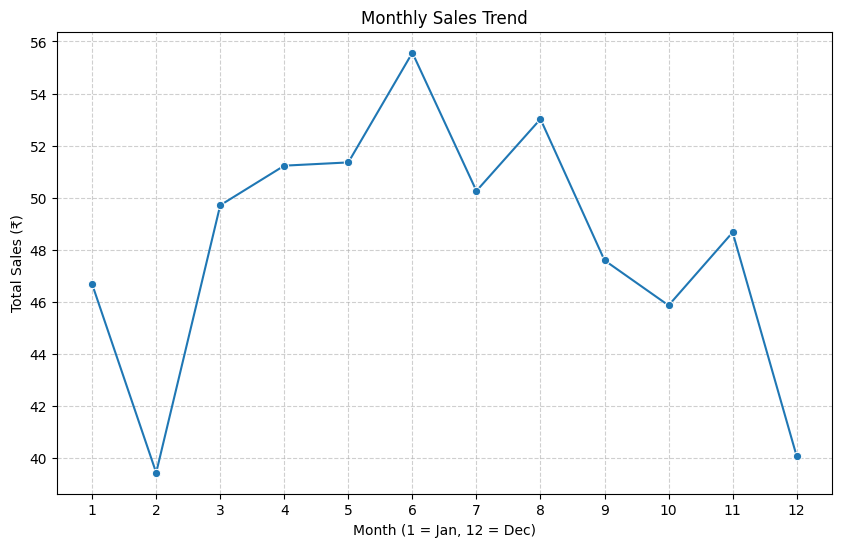

In [877]:
monthly_sales = df.groupby('PurchaseMonth')['TotalAmount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('PurchaseMonth')
plt.figure(figsize=(10,6))
sns.lineplot(x='PurchaseMonth', y='TotalAmount', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Total Sales (₹)")
plt.xticks(range(1,13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


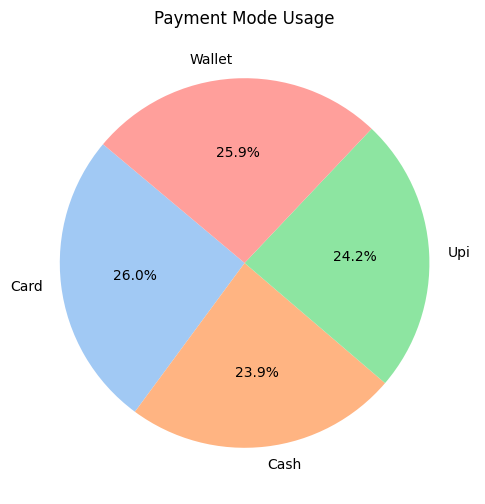

In [878]:
payment_cols = [col for col in df.columns if col.startswith('PaymentMode_')]

payment_usage = {
    col.replace('PaymentMode_', ''): df[col].sum()
    for col in payment_cols
}

plt.figure(figsize=(6,6))
plt.pie(payment_usage.values(), labels=payment_usage.keys(), autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))
plt.title("Payment Mode Usage")
plt.show()


C:\Users\Dharshini\AppData\Local\Temp\ipykernel_23324\2820381843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='AvgSpend', data=avg_spend_df, palette='viridis')


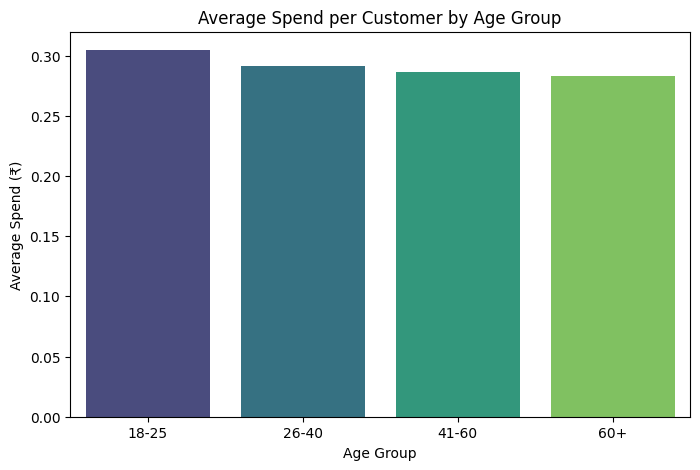

In [879]:
agegroup_cols = [col for col in df.columns if col.startswith('AgeGroup_')]

avg_spend = {}
for col in agegroup_cols:
    group = col.replace('AgeGroup_', '')
    avg_spend[group] = df.loc[df[col] == 1, 'TotalAmount'].mean()

avg_spend_df = pd.DataFrame(list(avg_spend.items()), columns=['AgeGroup', 'AvgSpend'])
avg_spend_df = avg_spend_df.sort_values(by='AvgSpend', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='AvgSpend', data=avg_spend_df, palette='viridis')
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend (₹)")
plt.show()


C:\Users\Dharshini\AppData\Local\Temp\ipykernel_23324\4274503061.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='City', data=city_revenue_df, palette='coolwarm')


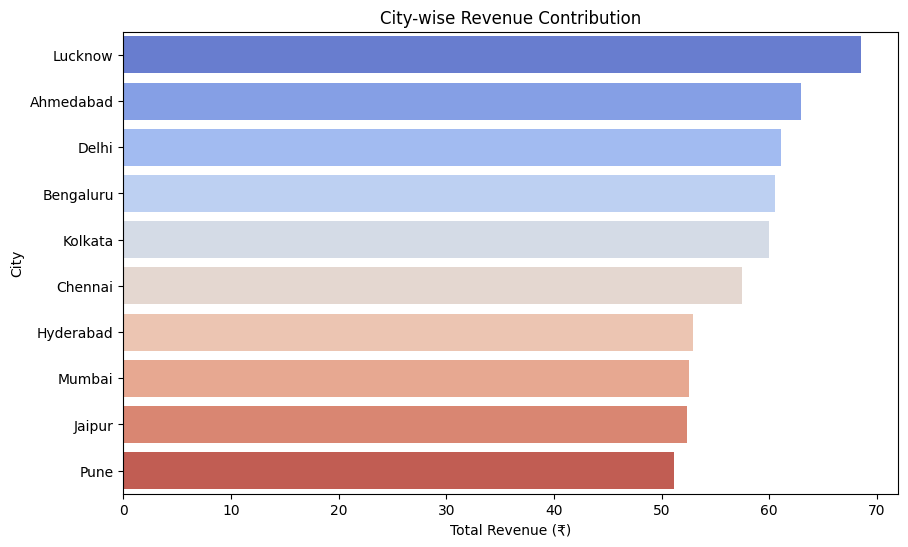

In [880]:
city_cols = [col for col in df.columns if col.startswith('City_')]

city_revenue = {col.replace('City_', ''): df.loc[df[col] == 1, 'TotalAmount'].sum() for col in city_cols}

city_revenue_df = pd.DataFrame(list(city_revenue.items()), columns=['City', 'Revenue'])
city_revenue_df = city_revenue_df.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='City', data=city_revenue_df, palette='coolwarm')
plt.title("City-wise Revenue Contribution")
plt.xlabel("Total Revenue (₹)")
plt.ylabel("City")
plt.show()


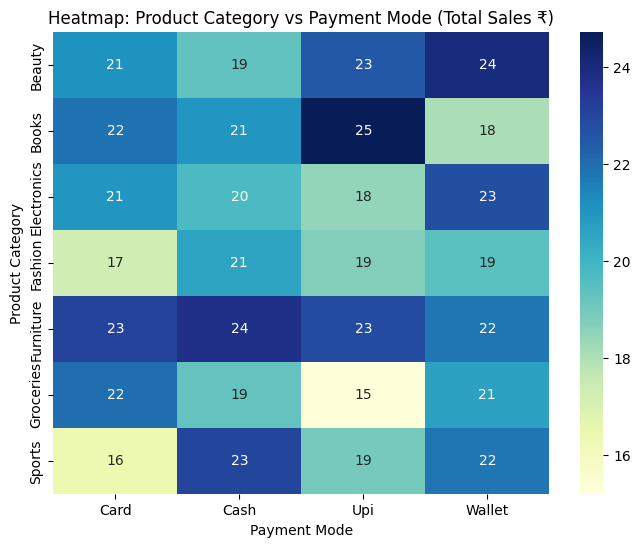

In [881]:
product_cols = [col for col in df.columns if col.startswith('ProductCategory_')]
payment_cols = [col for col in df.columns if col.startswith('PaymentMode_')]

heatmap_data = pd.DataFrame(index=[col.replace('ProductCategory_', '') for col in product_cols],
                            columns=[col.replace('PaymentMode_', '') for col in payment_cols])

for p_col in product_cols:
    for pay_col in payment_cols:
        total = df.loc[(df[p_col] == 1) & (df[pay_col] == 1), 'TotalAmount'].sum()
        heatmap_data.loc[p_col.replace('ProductCategory_', ''), pay_col.replace('PaymentMode_', '')] = total

heatmap_data = heatmap_data.astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Heatmap: Product Category vs Payment Mode (Total Sales ₹)")
plt.xlabel("Payment Mode")
plt.ylabel("Product Category")
plt.show()
